<a href="https://colab.research.google.com/github/hasini031/DSA0216-CV/blob/main/Activity_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your image


Saving Screenshot 2026-02-12 102838.png to Screenshot 2026-02-12 102838.png


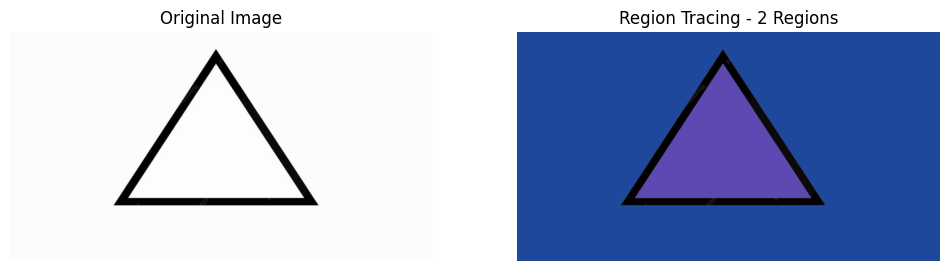

Found 2 regions
Region 1: Area = 387296 pixels
Region 2: Area = 56629 pixels


In [3]:
!pip install opencv-python-headless matplotlib numpy scikit-image

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("Upload your image")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = cv2.imread(filename)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_thresh, connectivity=8)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_color = img_rgb.copy()

colors = np.random.randint(0, 255, size=(num_labels, 3))

for i in range(1, num_labels):
    img_color[labels == i] = colors[i]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_color)
plt.title(f"Region Tracing - {num_labels-1} Regions")
plt.axis("off")

plt.show()

print(f"Found {num_labels-1} regions")
for i in range(1, num_labels):
    print(f"Region {i}: Area = {stats[i, cv2.CC_STAT_AREA]} pixels")
